---
# Jupyter notebook Bench_Grid_HiRep starts
---

## Importing the packages and checking if they are on system.
---

In [189]:
# ----------------------------------------------------------------------------
# [Python-3.12] basic import for system check
# ----------------------------------------------------------------------------
import os
import sys
import time
import requests
import multiprocessing
import multiprocess
from collections import defaultdict
from functools import cache
from pathlib import Path
from glob import glob
# ----------------------------------------------------------------------------
# [Data-Plotting]
# ----------------------------------------------------------------------------
try:
    import numpy
    NUMPY_AVAILABLE = True
except (ImportError, NameError, AttributeError, OSError):
    print(" Python package numpy is not installed on your system, verify or install\n")
    NUMPY_AVAILABLE = False
try:
    import matplotlib.pyplot
    MATPLOTLIB_PYPLOT_AVAILABLE = True
except (ImportError, NameError, AttributeError, OSError):
    print(" Python package matplotlib.pyplot is not installed on your system, verify or install\n")
    MATPLOTLIB_PYPLOT_AVAILABLE = False
try:
    import matplotlib.colors
    MATPLOTLIB_COLORS_AVAILABLE = True
except (ImportError, NameError, AttributeError, OSError):
    print(" Python package matplotlib.colors is not installed on your system, verify or install\n")
    MATPLOTLIB_COLORS_AVAILABLE = False
try:
    import matplotlib
    MATPLOTLIB_AVAILABLE = True
except (ImportError, NameError, AttributeError, OSError):
    print(" Python package matplotlib is not installed on your system, verify or install\n")
    MATPLOTLIB_AVAILABLE = False
try:
    import tqdm
    TQDM_AVAILABLE = True
except (ImportError, NameError, AttributeError, OSError):
    print(" Python package tqdm is not installed on your system, verify or install\n")
    TQDM_AVAILABLE = False
try:
    import pandas
    PANDAS_AVAILABLE = True
except (ImportError, NameError, AttributeError, OSError):
    print(" Python package pandas is not installed on your system, verify or install\n")
    PANDAS_AVAILABLE = False
try:
    import seaborn
    SEABORN_AVAILABLE = True
except (ImportError, NameError, AttributeError, OSError):
    print(" Python package seaborn is not installed on your system, verify or install\n")
    SEABORN_AVAILABLE = False

## Checking and printing check result
---

In [190]:
# ----------------------------------------------------------------------------
# [Import-checks]
# ----------------------------------------------------------------------------
print("\n")
print("MATPLOTLIB_AVAILABLE        --- installed --->: ", MATPLOTLIB_AVAILABLE)
print("MATPLOTLIB_PYPLOT_AVAILABLE --- installed --->: ", MATPLOTLIB_PYPLOT_AVAILABLE)
print("MATPLOTLIB_COLORS_AVAILABLE --- installed --->: ", MATPLOTLIB_COLORS_AVAILABLE)
print("TQDM_AVAILABLE              --- installed --->: ", TQDM_AVAILABLE)
print("PANDAS_AVAILABLE            --- installed --->: ", PANDAS_AVAILABLE)
print("SEABORN_AVAILABLE           --- installed --->: ", SEABORN_AVAILABLE)
print("NUMPY_AVAILABLE             --- installed --->: ", NUMPY_AVAILABLE)
print("\n")



MATPLOTLIB_AVAILABLE        --- installed --->:  True
MATPLOTLIB_PYPLOT_AVAILABLE --- installed --->:  True
MATPLOTLIB_COLORS_AVAILABLE --- installed --->:  True
TQDM_AVAILABLE              --- installed --->:  True
PANDAS_AVAILABLE            --- installed --->:  True
SEABORN_AVAILABLE           --- installed --->:  True
NUMPY_AVAILABLE             --- installed --->:  True




## Setting up the computation on the benchmark
---

In [191]:
start_key_rep_lst = [
    'Performing benchmark for SU(2), adjoint',
    'Performing benchmark for SU(2), fundamental',
    'Performing benchmark for SU(3), fundamental',
    'Performing benchmark for Sp(4), fundamental'
]

## Setting up the main path structure and appending to system path.
---

In [192]:
# ----------------------------------------------------------------------------
# [Path]
# ----------------------------------------------------------------------------
current_path = str(Path(sys.path[0]) / "..")
if current_path not in sys.path: sys.path.append(current_path)

APP_ROOT          = os.path.join(os.getcwd(), '..','..','..','..')
DATA_PATH         = os.path.join('E:','LatticeRuns','Clusters')
PROJECTNAME       = ""
POOL_COMPONENTDIR = ""
SOFTWARE          = "N/A"
SQL_DIR           = 'SQLFiles_sql'
APP_DATA_PATH     = "N/A"

DATAPROCINTERCOM  = ""
TBLECNTS_DIR      = ""
SQL_FULLPATH_DIR  = os.path.join(os.getcwd())
# ----------------------------------------------------------------------------
# [SystemPath-Appens]
# ----------------------------------------------------------------------------
sys.path.append(APP_ROOT)
sys.path.append(APP_DATA_PATH)
sys.path.append(DATA_PATH)
sys.path.append(os.path.join(APP_ROOT, '.'))
sys.path.append(os.path.join(APP_ROOT, '.','src','PythonCodes'))
sys.path.append(os.path.join(APP_ROOT, '.','src','PythonCodes','utils'))

print("Current Path  --->: ", current_path)
print("APP_ROOT      --->: ", APP_ROOT)
print("DATA_PATH     --->: ", DATA_PATH)
print("APP_DATA_PATH --->: ", APP_DATA_PATH)

Current Path  --->:  C:\cygwin64\home\Frederic\SwanSea\SourceCodes\Bench_Grid_HiRep\src\PythonCodes\Jupyter-NoteBooks\LLR-Bench_Grid_HiRep_Notebooks\..
APP_ROOT      --->:  C:\cygwin64\home\Frederic\SwanSea\SourceCodes\Bench_Grid_HiRep\src\PythonCodes\Jupyter-NoteBooks\LLR-Bench_Grid_HiRep_Notebooks\..\..\..\..
DATA_PATH     --->:  E:LatticeRuns\Clusters
APP_DATA_PATH --->:  N/A


## Importing the application objects.
---

In [193]:
# ----------------------------------------------------------------------------
# [Application]
# ----------------------------------------------------------------------------
#Application imports
import src.PythonCodes.DataManage_common
import src.PythonCodes.utils.messageHandler
import src.PythonCodes.utils.Command_line
import src.PythonCodes.DataManage_header

## Instantiating the main objects
---

In [194]:
# ----------------------------------------------------------------------------
version = src.PythonCodes.DataManage_common.DataManage_version()
c = src.PythonCodes.DataManage_common.DataManage_common()
rc = c.get_RC_SUCCESS()
# Getting the log file
logfile = c.getLogfileName()  #getting the name of the global log file
m = src.PythonCodes.utils.messageHandler.messageHandler(logfile = logfile)
# printing the header of Application
src.PythonCodes.DataManage_header.print_Bench_Grid_header(common=c, messageHandler=m)
# ----------------------------------------------------------------------------


 == [ ************************************************************************************] ==
 == [ *                    python code to run the Benchmarking suite.                    *] ==
 == [ *                                                                                  *] ==
 == [ * XXXXXX                          XX                XXXX             X        XX   *] ==
 == [ * X    X                          X               X    X                      X    *] ==
 == [ * X    X                          X              X                            X    *] ==
 == [ * X    X  XXXXX  XX XX    XXXXX   X XX           X       XXX XX   XXX     XXXXX    *] ==
 == [ * XXXXX  X     X  XX  X  X     X  XX  X          X         XX  X    X    X    X    *] ==
 == [ * X    X XXXXXXX  X   X  X        X   X  XXXXXXX X   XXX   X        X    X    X    *] ==
 == [ * X    X X        X   X  X        X   X          X     X   X        X    X    X    *] ==
 == [ * X    X X     X  X   X  X     X  X   X    

## Setting the path structure into the main objects
---

In [195]:
# ----------------------------------------------------------------------------
c.setApp_root(APP_ROOT)
c.setData_path(DATA_PATH)
c.setProjectName(PROJECTNAME)
c.setPool_componentdir(POOL_COMPONENTDIR)
c.setSoftware(SOFTWARE)
c.setDataProcInterCom(DATAPROCINTERCOM)
c.setJSon_TableCounts_Dir(TBLECNTS_DIR)
c.setSql_dir(SQL_DIR)
c.setSql_fullPath_dir(SQL_FULLPATH_DIR)
# ----------------------------------------------------------------------------

## Starting the program
---

In [196]:
# --------------------------------------------------------------------------
# [Main-code]
# --------------------------------------------------------------------------
m.printMesgStr("This is the main program      :", c.getCyan(), "Bench_Grid_HiRep.py")

 == [This is the main program      : Bench_Grid_HiRep.py] ==


## Main functions
---

### Reinitialising_Paths_and_object_content

In [197]:
def Reinitialising_Paths_and_object_content(c, m, data_path, b_action, sim_sz):
    __func__= sys._getframe().f_code.co_name
    rc = c.get_RC_SUCCESS()
    m.printMesgStr("Getting target file list      :", c.getGreen(), __func__)
    # ----------------------------------------------------------------------
    c.setData_path(data_path)
    c.setTarget_File("target.txt")

    target_file_default = c.getTarget_File()
    m.printMesgStr("Default target file           :", c.getMagenta(), target_file_default)

    msg_analysis = c.getTarget_File().split(".txt")[0] + c.undr_scr + \
                    b_action      + c.undr_scr                      + \
                    sim_sz        + c.undr_scr                      + \
                    "batch_files" + c.txt_ext

    c.setTarget_File(str(msg_analysis))
    m.printMesgStr("Target file for analysis      :", c.getMagenta(), c.getTarget_File())

    c.setTargetdir( os.path.join(c.getData_path(), c.getTarget_File()))
    m.printMesgStr("Full Path target file         :", c.getCyan(), c.getTargetdir())

    if Path(c.getTargetdir()).is_file():
        m.printMesgAddStr("[Check]: target file       --->: ", c.getGreen(), "Exists")
    # ----------------------------------------------------------------------
    return rc
# [end-function]
# --------------------------------------------------------------------------

### getTarget_file_lst

In [198]:
def getTarget_file_lst(c, m, target_file):
    __func__= sys._getframe().f_code.co_name
    rc = c.get_RC_SUCCESS()
    m.printMesgStr("Getting target file list      :", c.getGreen(), __func__)
    # ----------------------------------------------------------------------
    target_file_lst = []
    target_file_dir = []
    try:
        with open(target_file) as file:
            cnt = 0
            for line in file:
                target_file_lst.append(os.path.basename(line).strip())
                target_file_dir.append(os.path.dirname(os.path.realpath(line)).strip())
                cnt += 1
            # [end-For-Loop]
            m.printMesgAddStr("Number of files in target_file : ", c.getYellow(), str(cnt))
        # [end-with]
    except IOError:
        m.printMesgAddStr(" Filename          : ",
                                   c.getCyan(), target_file)
        m.printMesgAddStr("                   : ",
                                   c.getRed(), "cannot be found check"
                                                    " if file exist")
        #exit(c.get_RC_FAIL())
    # [end-try-catch]
    return rc, target_file_lst, target_file_dir
# [end-function]
# --------------------------------------------------------------------------

### getTaget_file_cluster_lst

In [199]:
def getTarget_file_cluster_lst(c, m, target_file_lst):
    __func__= sys._getframe().f_code.co_name
    rc = c.get_RC_SUCCESS()
    m.printMesgStr("Getting target file list      :", c.getGreen(), __func__)
    # ----------------------------------------------------------------------
    target_file_cluster_lst = []
    for i in range(len(target_file_lst[:])):
        msg = (os.path.join(c.getData_path(), batch_action, simulation_size, str(target_file_lst[i].split(".sh")[0]), target_file_lst[i])).strip()
        if Path(msg).is_file():
            m.printMesgAddStr("[Check]: target file       --->: ", c.getGreen(), c.getMagenta()+ msg + c.getGreen() + " ---> Exists")
            # Now get the output file to analise and put it into a list
            cluster_out_file = msg.split(".sh")[0]+".out"
            # Extracting cluster files that has been benched
            if Path(cluster_out_file).is_file():
                m.printMesgAddStr("[Check]: Cluster file      --->: ", c.getGreen(), c.getYellow()+ cluster_out_file + c.getGreen() + " ---> Exists")
                target_file_cluster_lst.append(cluster_out_file)
            # [end-if]
        # [end-if]
    # [end-for-loop]
    return rc, target_file_cluster_lst
# [end-function]
# --------------------------------------------------------------------------


### extract_dataframes_representation

In [200]:
def extract_dataframes_from_representation(c, line,
                                            split_string,
                                            cg_run_time_lst,
                                            FlOps_GFlOps_lst,
                                            Comms_MB_lst,
                                            Memory_GB_lst,
                                            mpi_distribution_lst,
                                            nnodes_lst,
                                            lattice_size_lst,
                                            representation_lst,
                                            ith_target_filename,
                                            run_file_name_lst):
    __func__= sys._getframe().f_code.co_name
    rc = c.get_RC_SUCCESS()
    #m.printMesgStr("Getting target file list      :", c.getGreen(), __func__)
    # ----------------------------------------------------------------------
    start_bkeeper_key = "BKeeper"
    if start_bkeeper_key in line.split('\n')[0]:
        #for ikey in range(len(start_key_rep_lst[:])):
        #    start_key_rep_ith = start_key_rep_lst[ikey]
        #    print(" start_key_rep_ith -->: ", start_key_rep_ith)
        #    if start_key_rep_ith in  line.split('\n')[0]:
        #        rep_value = str(start_key_rep_ith).split('Performing benchmark for ')[1]
        #        representation_lst.append(rep_value)
        #rep_value = "empty_string"
        if 'Performing benchmark for ' in line.split('\n')[0]:
            rep_value = str(line.split('\n')[0]).split('Performing benchmark for ')[1].split(' #')[0]
            #print("rep_value --->: ", rep_value)
            if rep_value != 'Sp(4), fundamental':
                representation_lst.append(rep_value)
                run_file_name_lst.append(ith_target_filename)

        if "CG Run Time (s)" in line.split('\n')[0]:
            key   = "CG Run Time (s)" #str(lines[j]).split(':')[0]
            value = str(str(line).split(':')[4]).split('\n')[0]
            cg_run_time_lst.append(float(value))

            lattice_size_lst.append(str(split_string[0]).split('lat'  )[1])
            mpi_distribution_lst.append(str(split_string[2]).split('mpi'  )[1])
            nnodes_lst.append(str(split_string[1]).split('nodes')[1])
            #if rep_value != "empty_string":

        if "FlOp/S (GFlOp/s)" in line.split('\n')[0]:
            key   = "FlOp/S (GFlOp/s)" #str(lines[j]).split(':')[0]
            value = str(str(line).split(':')[4]).split('\n')[0]
            FlOps_GFlOps_lst.append(float(value))
        if "Comms  (MB)" in  line.split('\n')[0]:
            key   = "Comms" #str(lines[j]).split(':')[0]
            value = str(str(line).split(':')[4]).split('\n')[0]
            Comms_MB_lst.append(float(value))
        if "Memory (GB)" in line.split('\n')[0]:
            key   = "Memory (GB)" #str(lines[j]).split(':')[0]
            value = str(str(line).split(':')[4]).split('\n')[0]
            Memory_GB_lst.append(float(value))
    # [end-if]
    # ----------------------------------------------------------------------
    return rc #, cg_run_time_lst, FlOps_GFlOps_lst, Comms_MB_lst, Memory_GB_lst, mpi_distribution_lst, nnodes_lst, lattice_size_lst, representation_lst
# [end-function]
# --------------------------------------------------------------------------


### Get number of representation in the raget file

In [201]:
def get_target_file_cluster_usable(c, nrep, line):
    __func__= sys._getframe().f_code.co_name
    rc = c.get_RC_SUCCESS()
    #m.printMesgStr("Getting target file list      :", c.getGreen(), __func__)
    # ----------------------------------------------------------------------
    start_bkeeper_key = "BKeeper"
    if start_bkeeper_key in line.split('\n')[0]:
        if 'Performing benchmark for ' in line.split('\n')[0]:
            rep_value = str(line.split('\n')[0]).split('Performing benchmark for ')[1].split(' #')[0]
            #print("rep_value --->: ", rep_value)
            nrep += 1
        # [end-if]
    # [end-if]
    # ----------------------------------------------------------------------
    return rc, nrep
# [end-function]
# --------------------------------------------------------------------------


### readCluster_file_out

In [202]:
def read_BKeeper_file_out(c, m, batch_action, simulation_size, target_file_cluster_lst):
    __func__= sys._getframe().f_code.co_name
    rc = c.get_RC_SUCCESS()
    m.printMesgStr("Getting target file list      :", c.getGreen(), __func__)
    # ----------------------------------------------------------------------
    end_key_rep = "###############################################"
    bench_BKeeper_dict = {}
    #start_bkeeper_key = "BKeeper"
    # Starting the parsing of files over the start_key_lst
    # TODO: loop over the representation key
    #ikey = 0
    cg_run_time_lst = []
    FlOps_GFlOps_lst = []
    Comms_MB_lst = []
    Memory_GB_lst = []
    mpi_distribution_lst = []
    nnodes_lst = []
    lattice_size_lst = []
    representation_lst = []
    run_file_name_lst = []
    # Making sure that the list are empty before inserting anything
    cg_run_time_lst.clear()
    FlOps_GFlOps_lst.clear()
    Comms_MB_lst.clear()
    Memory_GB_lst.clear()
    mpi_distribution_lst.clear()
    nnodes_lst.clear()
    lattice_size_lst.clear()
    representation_lst.clear()
    run_file_name_lst.clear()
    #
    #for i in range(6):
    for i in tqdm.tqdm(range(len(target_file_cluster_lst[:])), ncols=100, desc='bench_BKeeper_dict'):
        #for i in range(len(target_file_cluster_lst[:])):
        try:
            if len(target_file_cluster_lst[:]) != 0:
                cluster_file = open(target_file_cluster_lst[i])
                # Getting the mpi_distribution, lattice size and number of nodes
                ith_file = os.path.basename(target_file_cluster_lst[i].split('\n')[0]).split('.out')[0].split('Run_')[1].split(batch_action+'_')[1].split('_'+simulation_size)[0]
                split_string = ith_file.split('_')

                lines = cluster_file.readlines()
                database_file_len = len(lines)
                #print("target_file_cluster_lst[i] -->: ", target_file_cluster_lst[i])

                for j in range(database_file_len):
                    rc = extract_dataframes_from_representation(c, lines[j], split_string,
                                                                cg_run_time_lst, FlOps_GFlOps_lst,
                                                                Comms_MB_lst, Memory_GB_lst,
                                                                mpi_distribution_lst, nnodes_lst,
                                                                lattice_size_lst, representation_lst,
                                                                target_file_cluster_lst[i], run_file_name_lst)
                # [end-for-loop [j]]
            # [end-if]
        except IOError:
            m.printMesgAddStr(" Filename          : ", c.getCyan(), target_file_cluster_lst[i])
            m.printMesgAddStr("                   : ", c.getRed(), "cannot be found check if file exist")
            #exit(c.get_RC_FAIL())
        # [end-try-catch]
    # [end-for-loop [i]]
    #print ("representation_lst[:]      --->: ", representation_lst[:] )
    #print ("len(representation_lst[:]) --->: ", len(representation_lst[:]) )
    #print ("cg_run_time_lst[:]         --->: ", cg_run_time_lst[:] )
    #print ("len(cg_run_time_lst[:])    --->: ", len(cg_run_time_lst[:]) )
    #print ("run_file_name_lst[:]       --->: ", run_file_name_lst[:] )
    #print ("len(run_file_name_lst[:])    --->: ", len(run_file_name_lst[:]) )

    bench_BKeeper_dict["Representation"]   = representation_lst[:]
    bench_BKeeper_dict["CG Run Time (s)"]  = cg_run_time_lst[:]
    bench_BKeeper_dict["FlOp/S (GFlOp/s)"] = FlOps_GFlOps_lst[:]
    bench_BKeeper_dict["Comms  (MB)"]      = Comms_MB_lst[:]
    bench_BKeeper_dict["Memory (GB)"]      = Memory_GB_lst[:]
    bench_BKeeper_dict["lattice"]          = lattice_size_lst[:]
    bench_BKeeper_dict["nodes"]            = nnodes_lst[:]
    bench_BKeeper_dict["mpi_distribution"] = mpi_distribution_lst[:]
    bench_BKeeper_dict["Run output file"]  = run_file_name_lst[:]

    # creating a dictionary from the output data
    #print(" printing the dictionay ---->: ", bench_BKeeper_dict)
    dataframe = pandas.DataFrame.from_dict(bench_BKeeper_dict)

    # Now sorting out the data from on the mpi_distribution column.
    dataframe.sort_values(by='mpi_distribution', inplace=True)

    return rc, dataframe
# [end-function]
# --------------------------------------------------------------------------


### filter_target_file_cluster_lst

In [203]:
def filter_target_file_cluster_lst(c, m, start_key_rep_lst, target_file_cluster_lst):
    __func__= sys._getframe().f_code.co_name
    rc = c.get_RC_SUCCESS()
    m.printMesgStr("Getting target file list      :", c.getGreen(), __func__)
    # ----------------------------------------------------------------------

    target_file_cluster_filtered_lst = []

    for i in tqdm.tqdm(range(len(target_file_cluster_lst[:])), ncols=100, desc='filter target file'):
        #for i in range(len(target_file_cluster_lst[:])):
        try:
            if len(target_file_cluster_lst[:]) != 0:
                cluster_file = open(target_file_cluster_lst[i])
                # Getting the mpi_distribution, lattice size and number of nodes
                ith_file = os.path.basename(target_file_cluster_lst[i].split('\n')[0]).split('.out')[0].split('Run_')[1].split(batch_action+'_')[1].split('_'+simulation_size)[0]
                split_string = ith_file.split('_')

                lines = cluster_file.readlines()
                database_file_len = len(lines)

                #print("target_file_cluster_lst[i] -->: ", target_file_cluster_lst[i])
                nrep = 0
                for j in range(database_file_len):
                    rc, nrep = get_target_file_cluster_usable(c, nrep, lines[j])
                # [end-for-loop [j]]

                #print("nrep ---->: ", nrep)
                if nrep == len(start_key_rep_lst[:]):
                    target_file_cluster_filtered_lst.append(target_file_cluster_lst[i])

        except IOError:
            m.printMesgAddStr(" Filename          : ", c.getCyan(), target_file_cluster_lst[i])
            m.printMesgAddStr("                   : ", c.getRed(), "cannot be found check if file exist")
            #exit(c.get_RC_FAIL())
        # [end-try-catch]
    # [end-for-loop [i]]

    return rc, target_file_cluster_filtered_lst
# [end-function]
# --------------------------------------------------------------------------


### plot_representation_matplotlib

In [204]:
def plot_representation_matplotlib(c, m, dataframe_rep_lst, mach_name):
    __func__= sys._getframe().f_code.co_name
    rc = c.get_RC_SUCCESS()
    m.printMesgStr("Getting target file list      :", c.getGreen(), __func__)
    # ----------------------------------------------------------------------
    # Create a combined DataFrame
    #df_combined = pandas.concat([df_su2_adj_lumi, df_su2_fun_lumi, df_su3_fun_lumi])
    df_combined = pandas.concat(dataframe_rep_lst)

    # Get unique representations and their corresponding means
    representations = df_combined["Representation"].unique()
    means = [df_combined[df_combined["Representation"] == rep]["CG Run Time (s)"].mean() for rep in representations]

    # Define bar positions
    x = numpy.arange(len(representations))

    # Create bar chart
    fig, ax = matplotlib.pyplot.subplots(figsize=(8, 5))
    bars = ax.bar(x, means, color=['blue', 'green', 'red'], alpha=0.7)

    # Add labels and title
    ax.set_xticks(x)
    ax.set_xticklabels(representations, rotation=15)
    ax.set_ylabel("Average CG Run Time (s) ["+str(mach_name)+"]")
    ax.set_title("Comparison of CG Run Time by Representation")

    # Add values on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),  # Offset label slightly
                textcoords="offset points",
                ha='center', va='bottom')

    matplotlib.pyplot.show()

    return rc
# [end-function]
# --------------------------------------------------------------------------


### plot_representation_seaborn

In [205]:
def plot_representation_seaborn(c, m, dataframe_rep_lst, mach_name, message):
    __func__= sys._getframe().f_code.co_name
    rc = c.get_RC_SUCCESS()
    m.printMesgStr("Getting target file list      :", c.getGreen(), __func__)
    # ----------------------------------------------------------------------
    # Combine the filtered DataFrames
    df_combined = pandas.concat(dataframe_rep_lst)

    # Set the figure size
    matplotlib.pyplot.figure(figsize=(8, 5))

    # Create a Seaborn barplot
    seaborn.barplot(data=df_combined, x="mpi_distribution", y="CG Run Time (s)" ) #, palette="coolwarm", errorbar=None)

    # Add labels and title
    matplotlib.pyplot.xlabel("mpi_distribution")
    matplotlib.pyplot.ylabel("Average CG Run Time (s)")
    matplotlib.pyplot.title("["+str(mach_name)+"] "+str(message))

    # Rotate x-axis labels for better readability
    matplotlib.pyplot.xticks(rotation=15)

    # Show the plot
    matplotlib.pyplot.show()

    return rc
# [end-function]
# --------------------------------------------------------------------------


### plot_groupByBars_matplotlib

In [206]:
def plot_groupByBars_matplotlib(c, m):
    __func__= sys._getframe().f_code.co_name
    rc = c.get_RC_SUCCESS()
    m.printMesgStr("Getting target file list      :", c.getGreen(), __func__)
    # ----------------------------------------------------------------------
    species = ("Adelie", "Chinstrap", "Gentoo")
    print(type(species))
    print(species)
    penguin_means = {
        'Bill Depth': (18.35, 18.43, 14.98),
        'Bill Length': (38.79, 48.83, 47.50),
        'Flipper Length': (189.95, 195.82, 217.19),
    }
    print(type(penguin_means))

    x = numpy.arange(len(species))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = matplotlib.pyplot.subplots(layout='constrained')

    for attribute, measurement in penguin_means.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Length (mm)')
    ax.set_title('Penguin attributes by species')
    ax.set_xticks(x + width, species)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0, 250)

    matplotlib.pyplot.show()

    return rc
# [end-function]
# --------------------------------------------------------------------------


In [207]:
def plot_BenchRes_groupByBars_matplotlib(c, m,
                                         df_mpi_distr,
                                         df_su2_adj,
                                         df_su2_fun,
                                         df_su3_fun,
                                         mach_name, message):
    __func__= sys._getframe().f_code.co_name
    rc = c.get_RC_SUCCESS()
    m.printMesgStr("Getting target file list      :", c.getGreen(), __func__)
    # ----------------------------------------------------------------------
    species = tuple(df_mpi_distr)
    #print(type(species))
    #print(species)
    grouped_data = {
        'SU(2) Adj': df_su2_adj,
        'SU(2) Fun': df_su2_fun,
        'SU(3) Fun': df_su3_fun,
    }
    colors = ['purple', 'blue', 'green'] #, 'red', 'black']
    #print(type(penguin_means))

    x = numpy.arange(len(species))  # the label locations
    width = 0.3  # the width of the bars
    multiplier = 0

    fig, ax = matplotlib.pyplot.subplots(layout='constrained', figsize=(16, 10))

    #for attribute, measurement in penguin_means.items():
    for (attribute, measurement), color in zip(grouped_data.items(), colors):
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute, color=color)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('CG Run Time (s)')
    ax.set_xlabel('MPI distribution')

    matplotlib.pyplot.setp(ax.get_xticklabels(), rotation=45, ha='right')

    ax.set_title("["+str(mach_name)+"] "+str(message))
    ax.set_xticks(x + width, species)
    ax.legend(loc='upper left', ncols=3)
    #ax.set_ylim(0, 250)

    matplotlib.pyplot.show()

    return rc
# [end-function]
# --------------------------------------------------------------------------


## Lumi
### [BKeeper_run_gpu : small]
---

In [208]:
machine_name_lumi = "Lumi"
DATA_PATH         = os.path.join('E:','LatticeRuns','Clusters',machine_name_lumi,'LatticeRuns')

In [209]:
batch_action = "BKeeper_run_gpu"
simulation_size="small"
rc = Reinitialising_Paths_and_object_content(c, m, DATA_PATH, batch_action, simulation_size)

 == [Getting target file list      : Reinitialising_Paths_and_object_content] ==
 == [Default target file           : target.txt] ==
 == [Target file for analysis      : target_BKeeper_run_gpu_small_batch_files.txt] ==
 == [Full Path target file         : E:LatticeRuns\Clusters\Lumi\LatticeRuns\target_BKeeper_run_gpu_small_batch_files.txt] ==
    [Check]: target file       --->: Exists


In [210]:
# --------------------------------------------------------------------------
# Getting content in the target file
rc, target_file_lst_lumi, target_file_dir_lumi = getTarget_file_lst(c, m, c.getTargetdir())


 == [Getting target file list      : getTarget_file_lst] ==
    Number of files in target_file : 51


In [211]:
# --------------------------------------------------------------------------
# Getting content in the target file
rc, target_file_cluster_lst_lumi = getTarget_file_cluster_lst(c, m, target_file_lst_lumi[:])

 == [Getting target file list      : getTarget_file_cluster_lst] ==
    [Check]: target file       --->: E:LatticeRuns\Clusters\Lumi\LatticeRuns\BKeeper_run_gpu\small\Run_BKeeper_run_gpu_lat24.24.24.32_nodes002_mpi01-01-04-04_small\Run_BKeeper_run_gpu_lat24.24.24.32_nodes002_mpi01-01-04-04_small.sh ---> Exists
    [Check]: Cluster file      --->: E:LatticeRuns\Clusters\Lumi\LatticeRuns\BKeeper_run_gpu\small\Run_BKeeper_run_gpu_lat24.24.24.32_nodes002_mpi01-01-04-04_small\Run_BKeeper_run_gpu_lat24.24.24.32_nodes002_mpi01-01-04-04_small.out ---> Exists
    [Check]: target file       --->: E:LatticeRuns\Clusters\Lumi\LatticeRuns\BKeeper_run_gpu\small\Run_BKeeper_run_gpu_lat24.24.24.32_nodes002_mpi04-02-02-01_small\Run_BKeeper_run_gpu_lat24.24.24.32_nodes002_mpi04-02-02-01_small.sh ---> Exists
    [Check]: Cluster file      --->: E:LatticeRuns\Clusters\Lumi\LatticeRuns\BKeeper_run_gpu\small\Run_BKeeper_run_gpu_lat24.24.24.32_nodes002_mpi04-02-02-01_small\Run_BKeeper_run_gpu_lat24.24.24.32_

In [212]:
# --------------------------------------------------------------------------
# [Data-Extraction]
# --------------------------------------------------------------------------
m.printMesgStr(   "Data extraction cluster out                       : ", c.getGreen(), machine_name_lumi)
m.printMesgAddStr("Simulation size                                   : ", c.getRed(), simulation_size)
m.printMesgAddStr("target_file_cluster_lst_lumi[:]               --->: ", c.getYellow(), target_file_cluster_lst_lumi[:])
m.printMesgAddStr("Length target_file_cluster_lst_lumi[:]        --->: ", c.getYellow(), len(target_file_cluster_lst_lumi[:]))


 == [Data extraction cluster out                       :  Lumi] ==
    Simulation size                                   : small
    target_file_cluster_lst_lumi[:]               --->: ['E:LatticeRuns\\Clusters\\Lumi\\LatticeRuns\\BKeeper_run_gpu\\small\\Run_BKeeper_run_gpu_lat24.24.24.32_nodes002_mpi01-01-04-04_small\\Run_BKeeper_run_gpu_lat24.24.24.32_nodes002_mpi01-01-04-04_small.out', 'E:LatticeRuns\\Clusters\\Lumi\\LatticeRuns\\BKeeper_run_gpu\\small\\Run_BKeeper_run_gpu_lat24.24.24.32_nodes002_mpi04-02-02-01_small\\Run_BKeeper_run_gpu_lat24.24.24.32_nodes002_mpi04-02-02-01_small.out', 'E:LatticeRuns\\Clusters\\Lumi\\LatticeRuns\\BKeeper_run_gpu\\small\\Run_BKeeper_run_gpu_lat24.24.24.32_nodes002_mpi01-08-02-01_small\\Run_BKeeper_run_gpu_lat24.24.24.32_nodes002_mpi01-08-02-01_small.out', 'E:LatticeRuns\\Clusters\\Lumi\\LatticeRuns\\BKeeper_run_gpu\\small\\Run_BKeeper_run_gpu_lat24.24.24.32_nodes002_mpi01-02-08-01_small\\Run_BKeeper_run_gpu_lat24.24.24.32_nodes002_mpi01-02-08-01_sm

In [213]:
# --------------------------------------------------------------------------
# Reading in the inout file
rc, target_file_cluster_filtered_lst_lumi = filter_target_file_cluster_lst(c, m,
                                                                            start_key_rep_lst[:],
                                                                            target_file_cluster_lst_lumi[:])

m.printMesgAddStr("len(target_file_cluster_filtered_lst_lumi[:]) --->: ", c.getYellow(), len(target_file_cluster_filtered_lst_lumi[:]))


 == [Getting target file list      : filter_target_file_cluster_lst] ==


filter target file: 100%|█████████████████████████████████████████| 51/51 [00:00<00:00, 1886.24it/s]

    len(target_file_cluster_filtered_lst_lumi[:]) --->: 33


In [214]:
# --------------------------------------------------------------------------
# Reading in the inout file
#rc, dataFrame_BKeeper_small_lumi = read_BKeeper_file_out(c, m, batch_action, simulation_size, target_file_cluster_lst_lumi[:])
rc, dataFrame_BKeeper_small_lumi = read_BKeeper_file_out(c, m, batch_action, simulation_size, target_file_cluster_filtered_lst_lumi[:])


 == [Getting target file list      : read_BKeeper_file_out] ==


bench_BKeeper_dict: 100%|██████████████████████████████████████████| 33/33 [00:00<00:00, 892.00it/s]


In [215]:
# --------------------------------------------------------------------------
# Reading in the inout file
m.printMesgStr("DataFrame BKeeper small Lumi-G                    : ", c.getGreen(), machine_name_lumi)
dataFrame_BKeeper_small_lumi

 == [DataFrame BKeeper small Lumi-G                    :  Lumi] ==


,Representation,CG Run Time (s),FlOp/S (GFlOp/s),Comms (MB),Memory (GB),lattice,nodes,mpi_distribution,Run output file
19,"SU(2), fundamental",0.040835,2474.87753,61.341696,35.301368,24.24.24.32,001,01-01-01-08,E:LatticeRuns\Clusters\Lumi\LatticeRuns\BKeepe...
20,"SU(3), fundamental",0.119773,1686.13442,92.012544,68.203114,24.24.24.32,001,01-01-01-08,E:LatticeRuns\Clusters\Lumi\LatticeRuns\BKeepe...
18,"SU(2), adjoint",0.106646,1893.67982,92.012544,68.203114,24.24.24.32,001,01-01-01-08,E:LatticeRuns\Clusters\Lumi\LatticeRuns\BKeepe...
63,"SU(2), adjoint",0.116027,1740.57227,92.012544,66.296729,24.24.24.32,001,01-01-02-04,E:LatticeRuns\Clusters\Lumi\LatticeRuns\BKeepe...
65,"SU(3), fundamental",0.116441,1734.38375,92.012544,66.296729,24.24.24.32,001,01-01-02-04,E:LatticeRuns\Clusters\Lumi\LatticeRuns\BKeepe...
...,...,...,...,...,...,...,...,...,...
7,"SU(2), fundamental",0.037031,2729.10869,122.683392,35.806511,24.24.24.32,002,04-02-01-02,E:LatticeRuns\Clusters\Lumi\LatticeRuns\BKeepe...
6,"SU(2), adjoint",0.145297,1389.93495,184.025088,69.231542,24.24.24.32,002,04-02-01-02,E:LatticeRuns\Clusters\Lumi\LatticeRuns\BKeepe...
38,"SU(3), fundamental",0.096044,2102.71728,184.025088,68.644962,24.24.24.32,002,04-04-01-01,E:LatticeRuns\Clusters\Lumi\LatticeRuns\BKeepe...
36,"SU(2), adjoint",0.136228,1482.46600,184.025088,68.644962,24.24.24.32,002,04-04-01-01,E:LatticeRuns\Clusters\Lumi\LatticeRuns\BKeepe...


 == [Plots DataFrame BKeeper small Lumi-G              :  Lumi] ==
 == [Getting target file list      : plot_BenchRes_groupByBars_matplotlib] ==


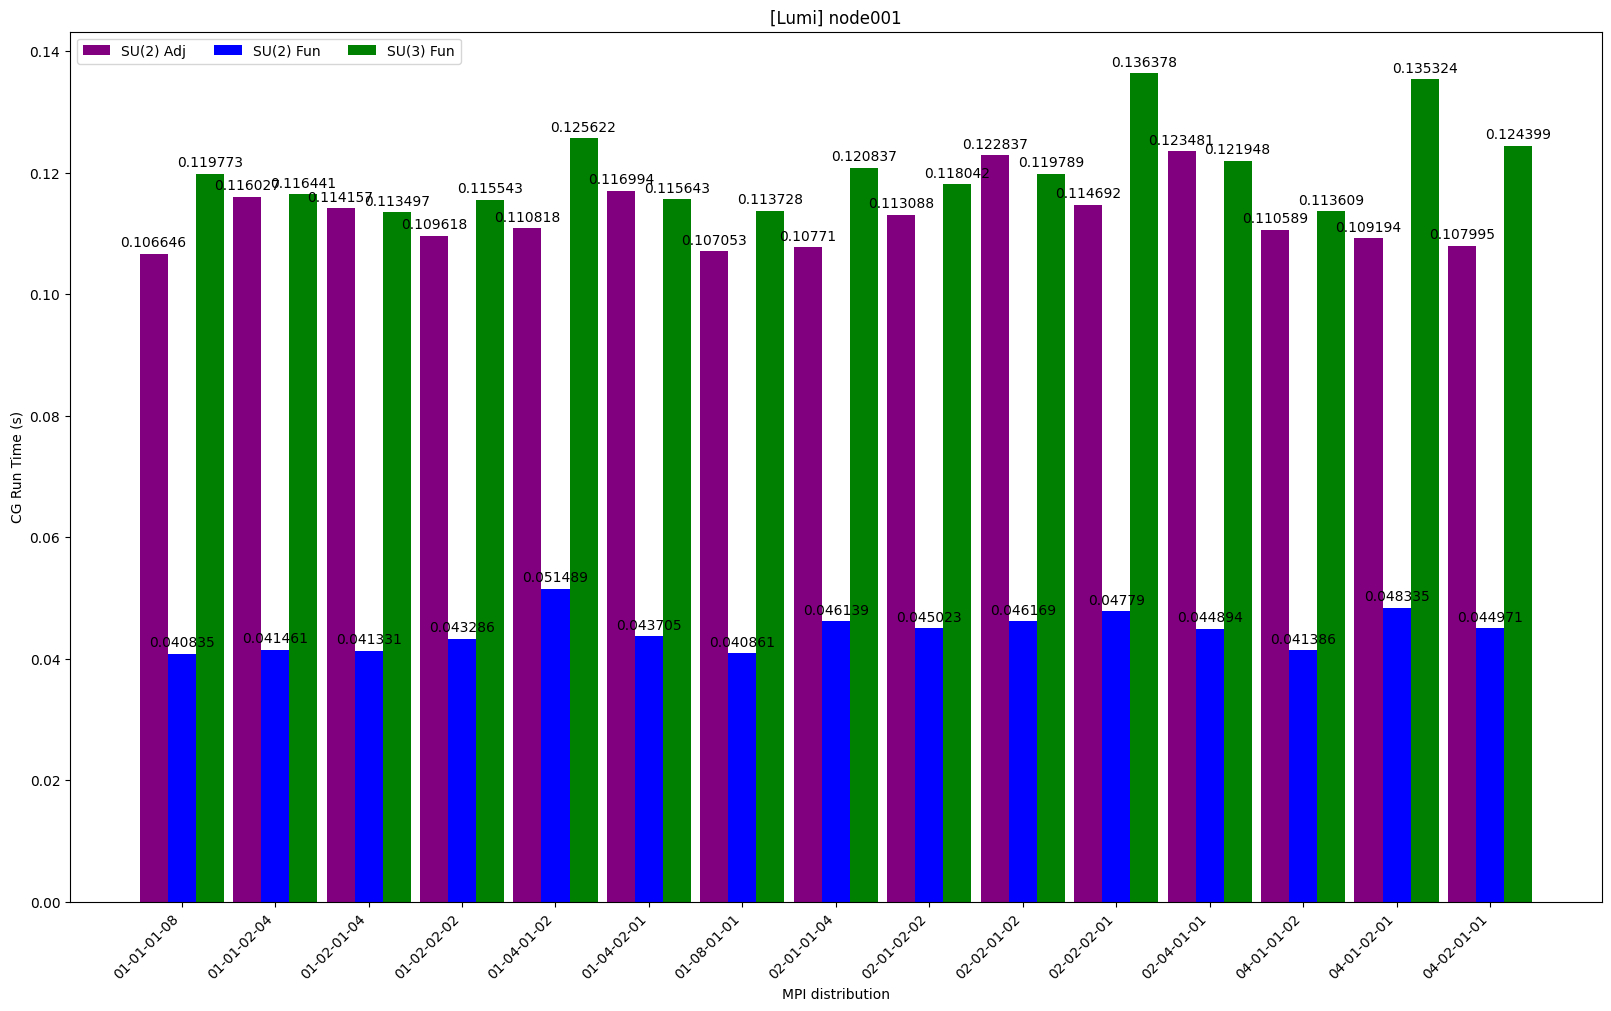

 == [Getting target file list      : plot_BenchRes_groupByBars_matplotlib] ==


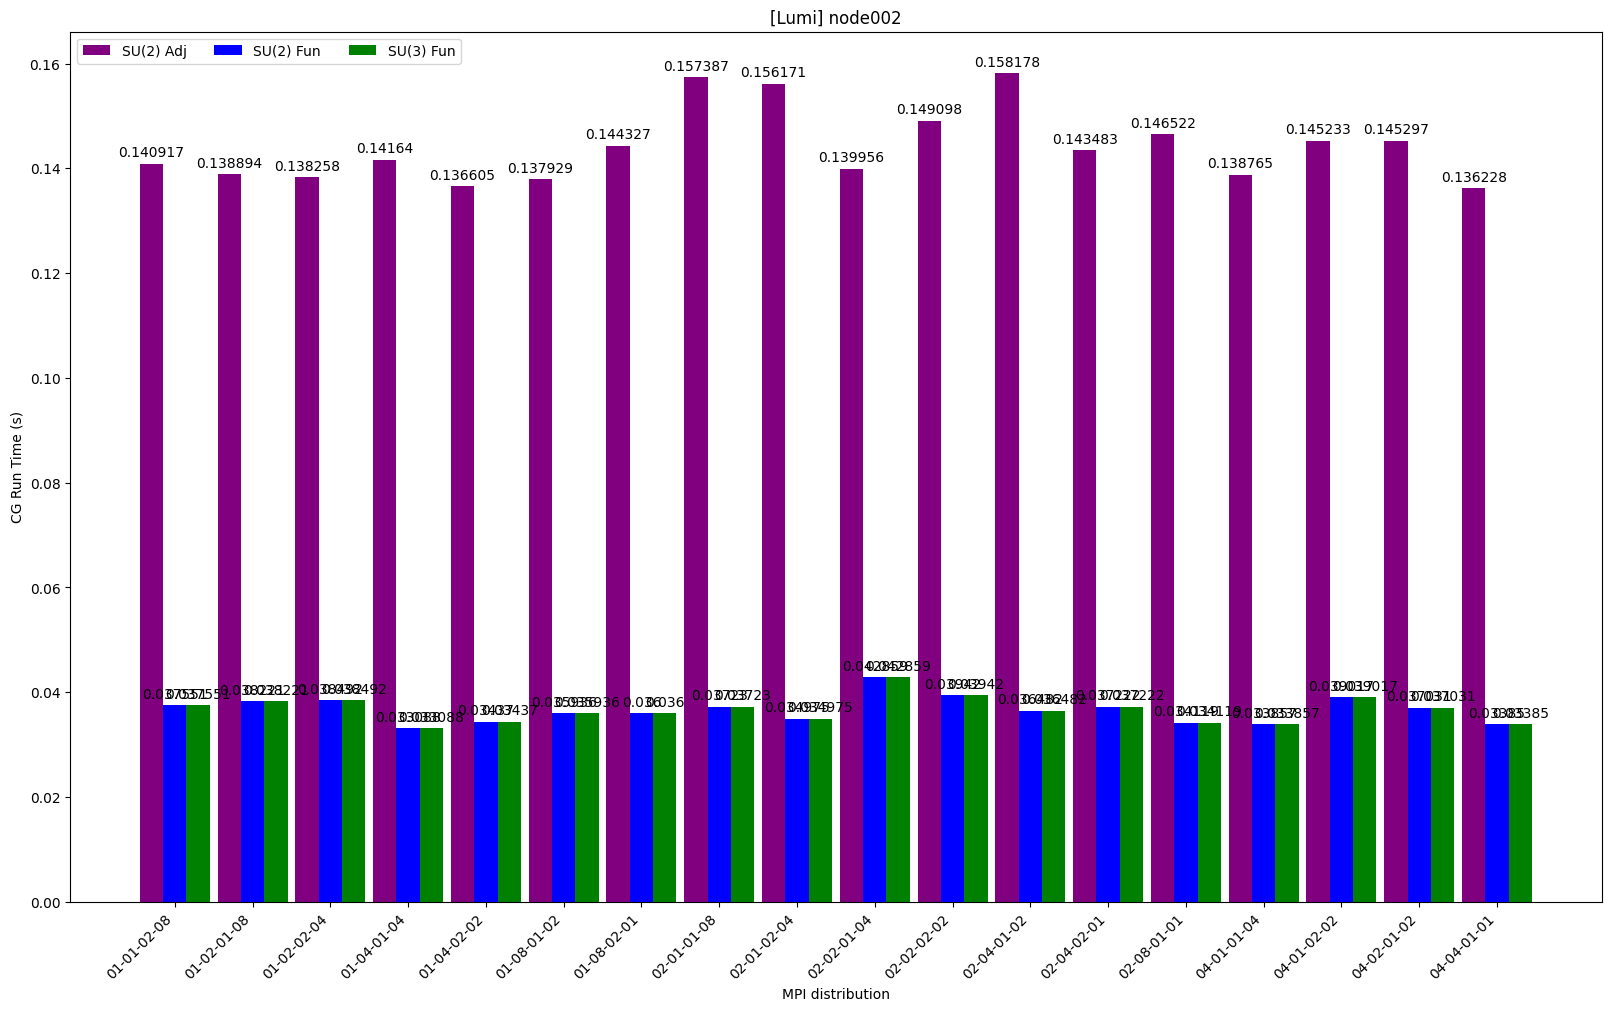

In [216]:
# --------------------------------------------------------------------------
# Reading in the inout file
m.printMesgStr("Plots DataFrame BKeeper small Lumi-G              : ", c.getGreen(), machine_name_lumi)

df_su2_adj_lumi = dataFrame_BKeeper_small_lumi[dataFrame_BKeeper_small_lumi["Representation"] == "SU(2), adjoint"][["Representation", "CG Run Time (s)","mpi_distribution","nodes"]]
df_su2_fun_lumi = dataFrame_BKeeper_small_lumi[dataFrame_BKeeper_small_lumi["Representation"] == "SU(2), fundamental"][["Representation", "CG Run Time (s)","mpi_distribution","nodes"]]
df_su3_fun_lumi = dataFrame_BKeeper_small_lumi[dataFrame_BKeeper_small_lumi["Representation"] == "SU(3), fundamental"][["Representation", "CG Run Time (s)","mpi_distribution","nodes"]]

# PLoting data
df_su2_adj_vega_mpi_node001     = df_su2_adj_lumi[df_su2_adj_lumi["nodes"] == "001"][["mpi_distribution"]]
df_su2_adj_lumi_cgtimes_node001 = df_su2_adj_lumi[df_su2_adj_lumi["nodes"] == "001"][["CG Run Time (s)"]]
df_su2_fun_lumi_cgtimes_node001 = df_su2_fun_lumi[df_su2_fun_lumi["nodes"] == "001"][["CG Run Time (s)"]]
df_su3_fun_lumi_cgtimes_node001 = df_su3_fun_lumi[df_su3_fun_lumi["nodes"] == "001"][["CG Run Time (s)"]]
rc = plot_BenchRes_groupByBars_matplotlib(c, m,
                                          df_su2_adj_vega_mpi_node001['mpi_distribution'],
                                          df_su2_adj_lumi_cgtimes_node001['CG Run Time (s)'],
                                          df_su2_fun_lumi_cgtimes_node001['CG Run Time (s)'],
                                          df_su3_fun_lumi_cgtimes_node001['CG Run Time (s)'],
                                          machine_name_lumi, "node001")

df_su2_adj_lumi_mpi_node002     = df_su2_adj_lumi[df_su2_adj_lumi["nodes"] == "002"][["mpi_distribution"]]
df_su2_adj_lumi_cgtimes_node002 = df_su2_adj_lumi[df_su2_adj_lumi["nodes"] == "002"][["CG Run Time (s)"]]
df_su2_fun_lumi_cgtimes_node002 = df_su2_fun_lumi[df_su2_fun_lumi["nodes"] == "002"][["CG Run Time (s)"]]
df_su3_fun_lumi_cgtimes_node002 = df_su2_fun_lumi[df_su2_fun_lumi["nodes"] == "002"][["CG Run Time (s)"]]
rc = plot_BenchRes_groupByBars_matplotlib(c, m,
                                          df_su2_adj_lumi_mpi_node002['mpi_distribution'],
                                          df_su2_adj_lumi_cgtimes_node002['CG Run Time (s)'],
                                          df_su2_fun_lumi_cgtimes_node002['CG Run Time (s)'],
                                          df_su3_fun_lumi_cgtimes_node002['CG Run Time (s)'],
                                          machine_name_lumi, "node002")


## Vega
### [BKeeper_run_gpu : small]
---

In [217]:
machine_name_vega = "Vega"
DATA_PATH         = os.path.join('E:','LatticeRuns','Clusters',machine_name_vega,'LatticeRuns')

In [218]:
# Reinitialising the paths and object content.
batch_action = "BKeeper_run_gpu"
simulation_size="small"
rc = Reinitialising_Paths_and_object_content(c, m, DATA_PATH, batch_action, simulation_size)

 == [Getting target file list      : Reinitialising_Paths_and_object_content] ==
 == [Default target file           : target.txt] ==
 == [Target file for analysis      : target_BKeeper_run_gpu_small_batch_files.txt] ==
 == [Full Path target file         : E:LatticeRuns\Clusters\Vega\LatticeRuns\target_BKeeper_run_gpu_small_batch_files.txt] ==
    [Check]: target file       --->: Exists


In [219]:
# --------------------------------------------------------------------------
# Getting content in the target file
rc, target_file_lst_vega, target_file_dir_vega = getTarget_file_lst(c, m, c.getTargetdir())

 == [Getting target file list      : getTarget_file_lst] ==
    Number of files in target_file : 26


In [220]:
# --------------------------------------------------------------------------
# Getting content in the target file
rc, target_file_cluster_lst_vega = getTarget_file_cluster_lst(c, m, target_file_lst_vega[:])

 == [Getting target file list      : getTarget_file_cluster_lst] ==
    [Check]: target file       --->: E:LatticeRuns\Clusters\Vega\LatticeRuns\BKeeper_run_gpu\small\Run_BKeeper_run_gpu_lat24.24.24.32_nodes002_mpi01-01-04-02_small\Run_BKeeper_run_gpu_lat24.24.24.32_nodes002_mpi01-01-04-02_small.sh ---> Exists
    [Check]: Cluster file      --->: E:LatticeRuns\Clusters\Vega\LatticeRuns\BKeeper_run_gpu\small\Run_BKeeper_run_gpu_lat24.24.24.32_nodes002_mpi01-01-04-02_small\Run_BKeeper_run_gpu_lat24.24.24.32_nodes002_mpi01-01-04-02_small.out ---> Exists
    [Check]: target file       --->: E:LatticeRuns\Clusters\Vega\LatticeRuns\BKeeper_run_gpu\small\Run_BKeeper_run_gpu_lat24.24.24.32_nodes002_mpi04-02-01-01_small\Run_BKeeper_run_gpu_lat24.24.24.32_nodes002_mpi04-02-01-01_small.sh ---> Exists
    [Check]: Cluster file      --->: E:LatticeRuns\Clusters\Vega\LatticeRuns\BKeeper_run_gpu\small\Run_BKeeper_run_gpu_lat24.24.24.32_nodes002_mpi04-02-01-01_small\Run_BKeeper_run_gpu_lat24.24.24.32_

In [221]:
# --------------------------------------------------------------------------
# [Data-Extraction]
# --------------------------------------------------------------------------
m.printMesgStr(   "Data extraction cluster out                       : ", c.getGreen(), machine_name_vega)
m.printMesgAddStr("Simulation size                                   : ", c.getRed(), simulation_size)
m.printMesgAddStr("target_file_cluster_lst_vega[:]               --->: ", c.getYellow(), target_file_cluster_lst_vega[:])
m.printMesgAddStr("Length target_file_cluster_lst_vega[:]        --->: ", c.getYellow(), len(target_file_cluster_lst_vega[:]))


 == [Data extraction cluster out                       :  Vega] ==
    Simulation size                                   : small
    target_file_cluster_lst_vega[:]               --->: ['E:LatticeRuns\\Clusters\\Vega\\LatticeRuns\\BKeeper_run_gpu\\small\\Run_BKeeper_run_gpu_lat24.24.24.32_nodes002_mpi01-01-04-02_small\\Run_BKeeper_run_gpu_lat24.24.24.32_nodes002_mpi01-01-04-02_small.out', 'E:LatticeRuns\\Clusters\\Vega\\LatticeRuns\\BKeeper_run_gpu\\small\\Run_BKeeper_run_gpu_lat24.24.24.32_nodes002_mpi04-02-01-01_small\\Run_BKeeper_run_gpu_lat24.24.24.32_nodes002_mpi04-02-01-01_small.out', 'E:LatticeRuns\\Clusters\\Vega\\LatticeRuns\\BKeeper_run_gpu\\small\\Run_BKeeper_run_gpu_lat24.24.24.32_nodes001_mpi04-01-01-01_small\\Run_BKeeper_run_gpu_lat24.24.24.32_nodes001_mpi04-01-01-01_small.out', 'E:LatticeRuns\\Clusters\\Vega\\LatticeRuns\\BKeeper_run_gpu\\small\\Run_BKeeper_run_gpu_lat24.24.24.32_nodes002_mpi01-01-02-04_small\\Run_BKeeper_run_gpu_lat24.24.24.32_nodes002_mpi01-01-02-04_sm

In [222]:
# --------------------------------------------------------------------------
# Reading in the inout file
rc, target_file_cluster_filtered_lst_vega = filter_target_file_cluster_lst(c, m,
                                                                           start_key_rep_lst[:],
                                                                           target_file_cluster_lst_vega[:])

m.printMesgAddStr("len(target_file_cluster_filtered_lst_vega[:]) --->: ", c.getYellow(), len(target_file_cluster_filtered_lst_vega[:]))


 == [Getting target file list      : filter_target_file_cluster_lst] ==


filter target file: 100%|██████████████████████████████████████████| 26/26 [00:00<00:00, 666.56it/s]

    len(target_file_cluster_filtered_lst_vega[:]) --->: 17


In [223]:
# --------------------------------------------------------------------------
# Reading in the inout file
rc, dataFrame_BKeeper_small_vega = read_BKeeper_file_out(c, m, batch_action, simulation_size, target_file_cluster_filtered_lst_vega[:])
# --------------------------------------------------------------------------

 == [Getting target file list      : read_BKeeper_file_out] ==


bench_BKeeper_dict: 100%|█████████████████████████████████████████| 17/17 [00:00<00:00, 1063.46it/s]


In [224]:
# --------------------------------------------------------------------------
# Reading in the inout file
m.printMesgStr("DataFrame BKeeper small Vega-GPU                  : ", c.getGreen(), machine_name_vega)
dataFrame_BKeeper_small_vega
# --------------------------------------------------------------------------

 == [DataFrame BKeeper small Vega-GPU                  :  Vega] ==


,Representation,CG Run Time (s),FlOp/S (GFlOp/s),Comms (MB),Memory (GB),lattice,nodes,mpi_distribution,Run output file
39,"SU(2), adjoint",0.287786,701.748446,184.025088,66.137848,24.24.24.32,001,01-01-01-04,E:LatticeRuns\Clusters\Vega\LatticeRuns\BKeepe...
41,"SU(3), fundamental",0.242571,832.553678,184.025088,66.137848,24.24.24.32,001,01-01-01-04,E:LatticeRuns\Clusters\Vega\LatticeRuns\BKeepe...
40,"SU(2), fundamental",0.188934,534.904378,122.683392,33.924518,24.24.24.32,001,01-01-01-04,E:LatticeRuns\Clusters\Vega\LatticeRuns\BKeepe...
50,"SU(3), fundamental",0.242955,831.237794,184.025088,65.184655,24.24.24.32,001,01-01-02-02,E:LatticeRuns\Clusters\Vega\LatticeRuns\BKeepe...
49,"SU(2), fundamental",0.198638,508.772862,122.683392,33.289056,24.24.24.32,001,01-01-02-02,E:LatticeRuns\Clusters\Vega\LatticeRuns\BKeepe...
48,"SU(2), adjoint",0.284494,709.868673,184.025088,65.184655,24.24.24.32,001,01-01-02-02,E:LatticeRuns\Clusters\Vega\LatticeRuns\BKeepe...
6,"SU(2), adjoint",0.209931,961.998839,92.012544,66.296729,24.24.24.32,002,01-01-02-04,E:LatticeRuns\Clusters\Vega\LatticeRuns\BKeepe...
7,"SU(2), fundamental",0.150005,673.721701,61.341696,34.030444,24.24.24.32,002,01-01-02-04,E:LatticeRuns\Clusters\Vega\LatticeRuns\BKeepe...
8,"SU(3), fundamental",0.212661,949.649340,92.012544,66.296729,24.24.24.32,002,01-01-02-04,E:LatticeRuns\Clusters\Vega\LatticeRuns\BKeepe...
35,"SU(3), fundamental",0.338323,596.924768,184.025088,65.184655,24.24.24.32,001,01-02-01-02,E:LatticeRuns\Clusters\Vega\LatticeRuns\BKeepe...


 == [Plots DataFrame BKeeper small Vega-G              :  Vega] ==
 == [Getting target file list      : plot_BenchRes_groupByBars_matplotlib] ==


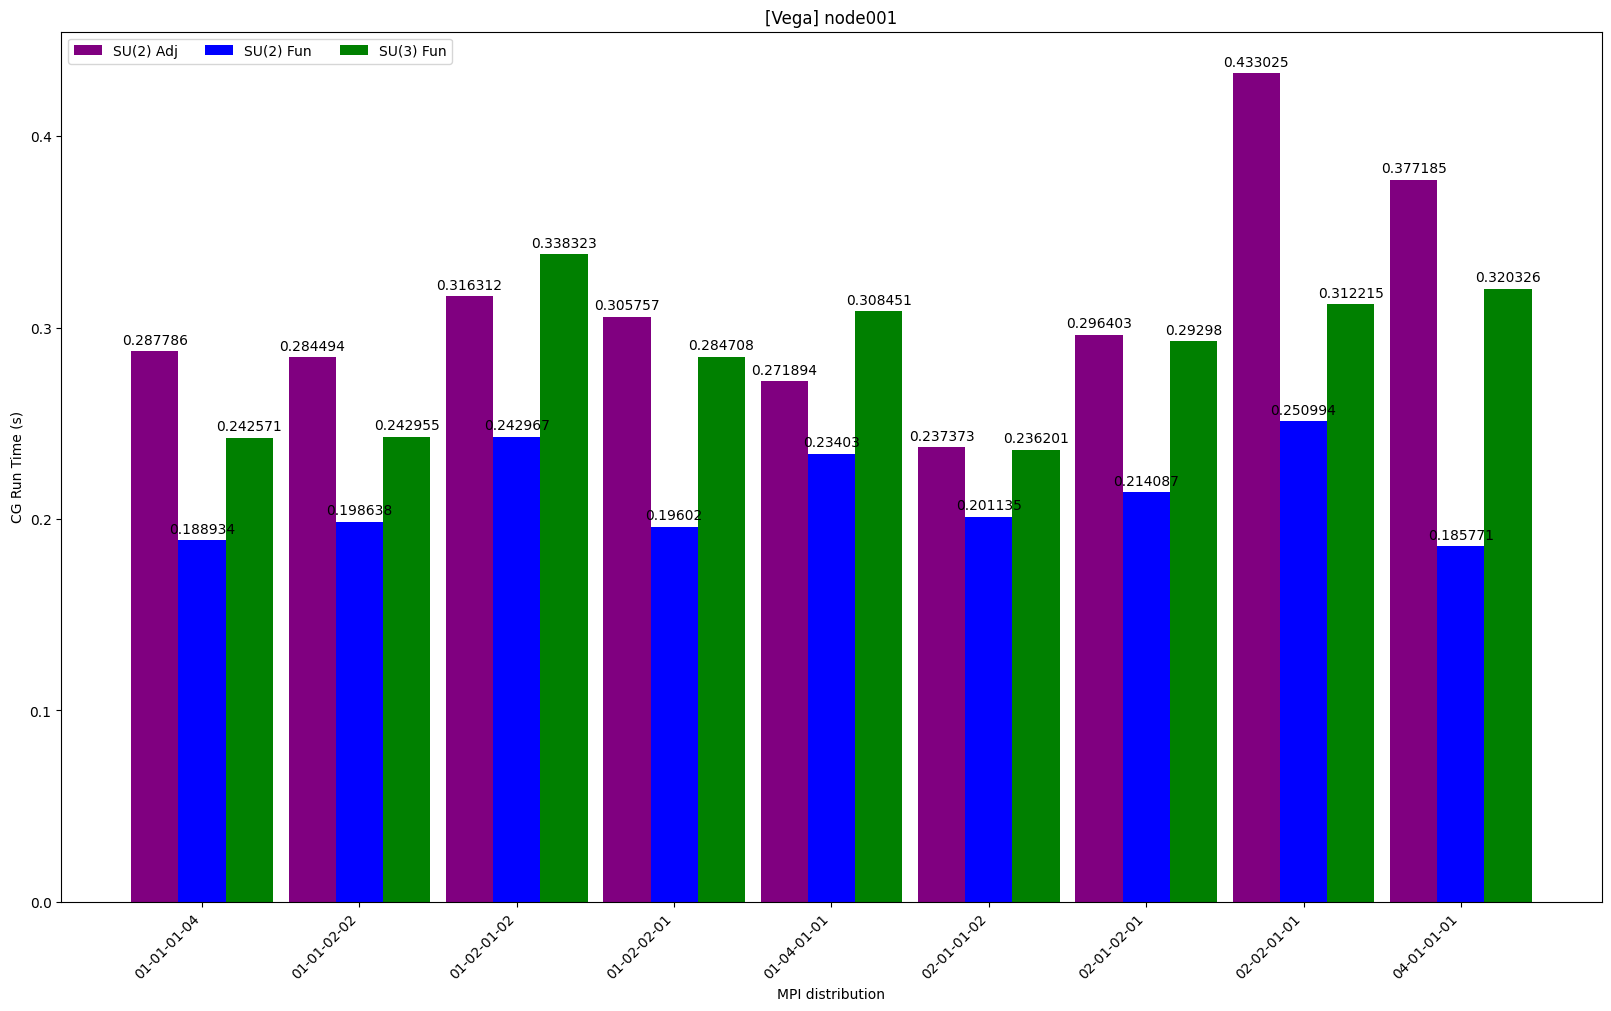

 == [Getting target file list      : plot_BenchRes_groupByBars_matplotlib] ==


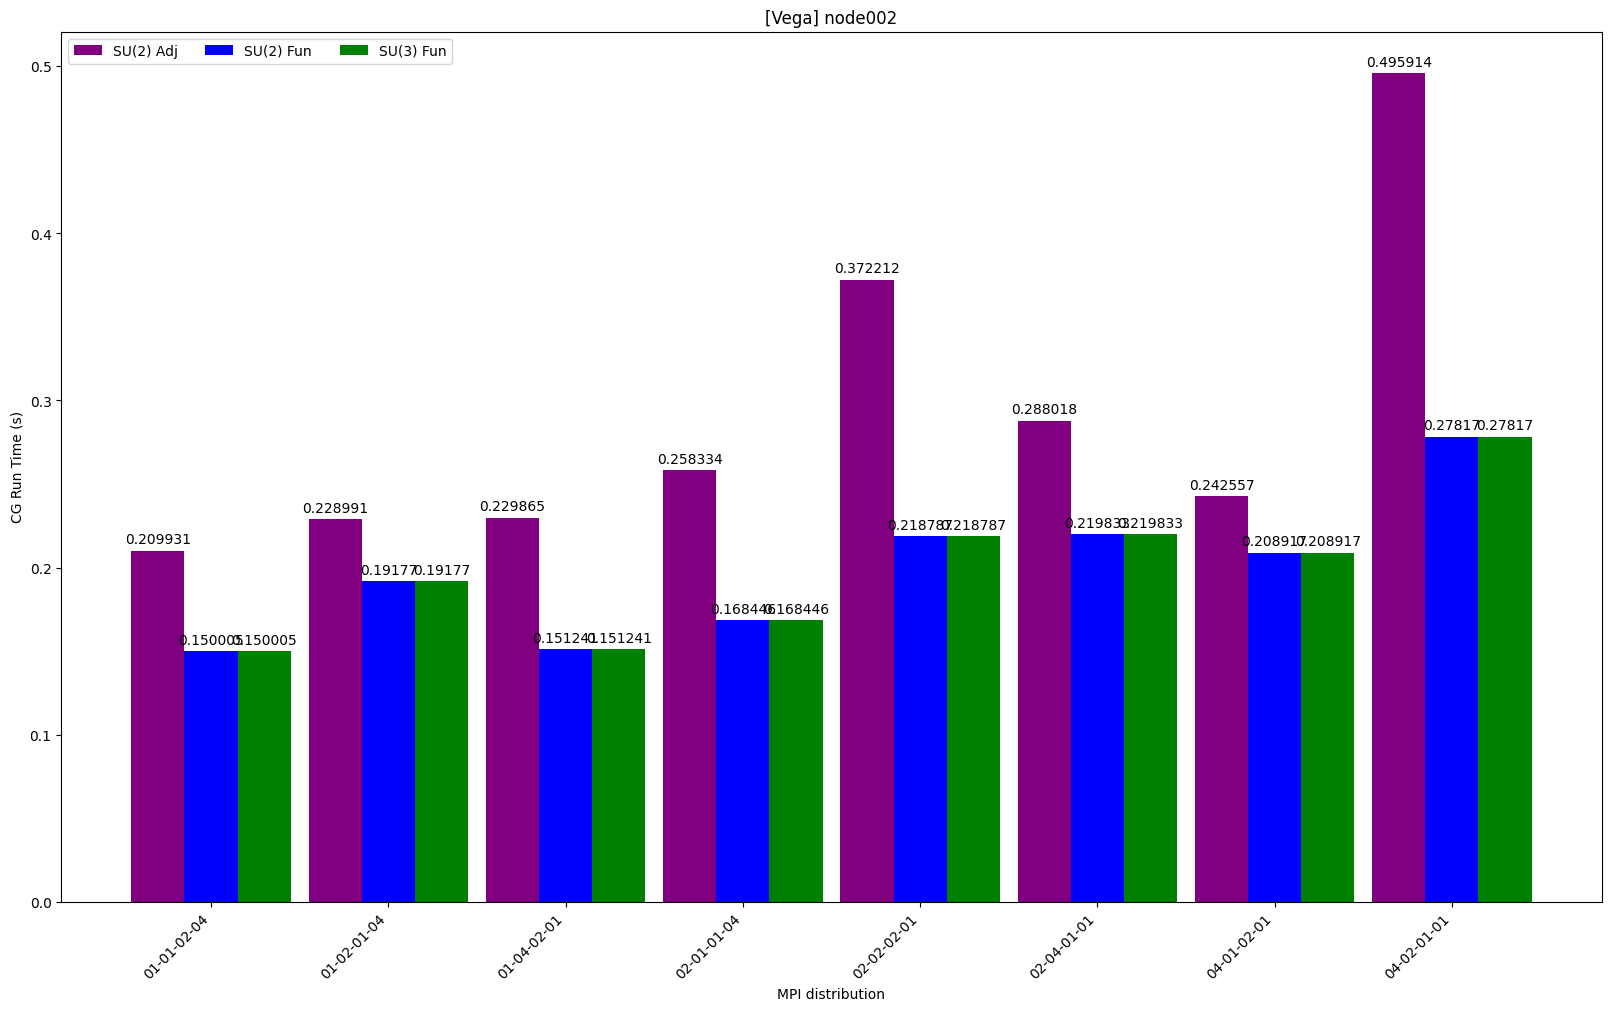

In [225]:
# --------------------------------------------------------------------------
# Reading in the inout file
m.printMesgStr("Plots DataFrame BKeeper small Vega-G              : ", c.getGreen(), machine_name_vega)

df_su2_adj_vega = dataFrame_BKeeper_small_vega[dataFrame_BKeeper_small_vega["Representation"] == "SU(2), adjoint"][["Representation", "CG Run Time (s)","mpi_distribution","nodes"]]
df_su2_fun_vega = dataFrame_BKeeper_small_vega[dataFrame_BKeeper_small_vega["Representation"] == "SU(2), fundamental"][["Representation", "CG Run Time (s)","mpi_distribution","nodes"]]
df_su3_fun_vega = dataFrame_BKeeper_small_vega[dataFrame_BKeeper_small_vega["Representation"] == "SU(3), fundamental"][["Representation", "CG Run Time (s)","mpi_distribution","nodes"]]

# PLoting data
df_su2_adj_vega_mpi_node001     = df_su2_adj_vega[df_su2_adj_vega["nodes"] == "001"][["mpi_distribution"]]
df_su2_adj_vega_cgtimes_node001 = df_su2_adj_vega[df_su2_adj_vega["nodes"] == "001"][["CG Run Time (s)"]]
df_su2_fun_vega_cgtimes_node001 = df_su2_fun_vega[df_su2_fun_vega["nodes"] == "001"][["CG Run Time (s)"]]
df_su3_fun_vega_cgtimes_node001 = df_su3_fun_vega[df_su3_fun_vega["nodes"] == "001"][["CG Run Time (s)"]]
rc = plot_BenchRes_groupByBars_matplotlib(c, m,
                                          df_su2_adj_vega_mpi_node001['mpi_distribution'],
                                          df_su2_adj_vega_cgtimes_node001['CG Run Time (s)'],
                                          df_su2_fun_vega_cgtimes_node001['CG Run Time (s)'],
                                          df_su3_fun_vega_cgtimes_node001['CG Run Time (s)'],
                                          machine_name_vega, "node001")

df_su2_adj_vega_mpi_node002     = df_su2_adj_vega[df_su2_adj_vega["nodes"] == "002"][["mpi_distribution"]]
df_su2_adj_vega_cgtimes_node002 = df_su2_adj_vega[df_su2_adj_vega["nodes"] == "002"][["CG Run Time (s)"]]
df_su2_fun_vega_cgtimes_node002 = df_su2_fun_vega[df_su2_fun_vega["nodes"] == "002"][["CG Run Time (s)"]]
df_su3_fun_vega_cgtimes_node002 = df_su2_fun_vega[df_su2_fun_vega["nodes"] == "002"][["CG Run Time (s)"]]
rc = plot_BenchRes_groupByBars_matplotlib(c, m,
                                          df_su2_adj_vega_mpi_node002['mpi_distribution'],
                                          df_su2_adj_vega_cgtimes_node002['CG Run Time (s)'],
                                          df_su2_fun_vega_cgtimes_node002['CG Run Time (s)'],
                                          df_su3_fun_vega_cgtimes_node002['CG Run Time (s)'],
                                          machine_name_vega, "node002")
# --------------------------------------------------------------------------

## Leonardo
### [BKeeper_run_gpu : small]
---

In [226]:
# --------------------------------------------------------------------------
machine_name_leonardo = "Leonardo"
DATA_PATH         = os.path.join('E:','LatticeRuns','Clusters',machine_name_leonardo,'LatticeRuns')
# --------------------------------------------------------------------------

In [227]:
# --------------------------------------------------------------------------
# Reinitialising the paths and object content.
batch_action = "BKeeper_run_gpu"
simulation_size="small"
rc = Reinitialising_Paths_and_object_content(c, m, DATA_PATH, batch_action, simulation_size)
# --------------------------------------------------------------------------

 == [Getting target file list      : Reinitialising_Paths_and_object_content] ==
 == [Default target file           : target.txt] ==
 == [Target file for analysis      : target_BKeeper_run_gpu_small_batch_files.txt] ==
 == [Full Path target file         : E:LatticeRuns\Clusters\Leonardo\LatticeRuns\target_BKeeper_run_gpu_small_batch_files.txt] ==


In [228]:
# --------------------------------------------------------------------------
# Getting content in the target file
rc, target_file_lst_leonardo, target_file_dir_leonardo = getTarget_file_lst(c, m, c.getTargetdir())
# --------------------------------------------------------------------------

 == [Getting target file list      : getTarget_file_lst] ==
     Filename          : E:LatticeRuns\Clusters\Leonardo\LatticeRuns\target_BKeeper_run_gpu_small_batch_files.txt
                       : cannot be found check if file exist


In [229]:
# --------------------------------------------------------------------------
# Getting content in the target file
rc, target_file_cluster_lst_leonardo = getTarget_file_cluster_lst(c, m, target_file_lst_leonardo[:])
# --------------------------------------------------------------------------

 == [Getting target file list      : getTarget_file_cluster_lst] ==


In [230]:
# --------------------------------------------------------------------------
# [Data-Extraction]
# --------------------------------------------------------------------------
m.printMesgStr(   "Data extraction cluster out                    : ", c.getGreen(), machine_name_leonardo)
m.printMesgAddStr("Simulation size                                : ", c.getRed(), simulation_size)
m.printMesgAddStr("target_file_cluster_lst_leonardo[:]        --->: ", c.getYellow(), target_file_cluster_lst_leonardo[:])
m.printMesgAddStr("Length target_file_cluster_lst_leonardo[:] --->: ", c.getYellow(), len(target_file_cluster_lst_leonardo[:]))
# --------------------------------------------------------------------------

 == [Data extraction cluster out                    :  Leonardo] ==
    Simulation size                                : small
    target_file_cluster_lst_leonardo[:]        --->: []
    Length target_file_cluster_lst_leonardo[:] --->: 0


In [231]:
# --------------------------------------------------------------------------
# Reading in the inout file
rc, target_file_cluster_filtered_lst_leonardo = filter_target_file_cluster_lst(c, m,
                                                                                start_key_rep_lst[:],
                                                                                target_file_cluster_lst_leonardo[:])

m.printMesgAddStr("len(target_file_cluster_filtered_lst_leonardo[:]) --->: ", c.getYellow(), len(target_file_cluster_filtered_lst_leonardo[:]))
# --------------------------------------------------------------------------

 == [Getting target file list      : filter_target_file_cluster_lst] ==


filter target file: 0it [00:00, ?it/s]

    len(target_file_cluster_filtered_lst_leonardo[:]) --->: 0


In [232]:
# --------------------------------------------------------------------------
# Reading in the inout file
rc, dataFrame_BKeeper_small_leonardo = read_BKeeper_file_out(c, m, batch_action, simulation_size, target_file_cluster_filtered_lst_leonardo[:])
# --------------------------------------------------------------------------

 == [Getting target file list      : read_BKeeper_file_out] ==


bench_BKeeper_dict: 0it [00:00, ?it/s]


In [233]:
# --------------------------------------------------------------------------
# Reading in the inout file
m.printMesgStr("DataFrame BKeeper small Leonardo-Booster          : ", c.getGreen(), machine_name_leonardo)
dataFrame_BKeeper_small_leonardo
# --------------------------------------------------------------------------

 == [DataFrame BKeeper small Leonardo-Booster          :  Leonardo] ==


,Representation,CG Run Time (s),FlOp/S (GFlOp/s),Comms (MB),Memory (GB),lattice,nodes,mpi_distribution,Run output file


 == [Plots DataFrame BKeeper small Leonardo-Booster    :  Leonardo] ==
 == [Getting target file list      : plot_BenchRes_groupByBars_matplotlib] ==


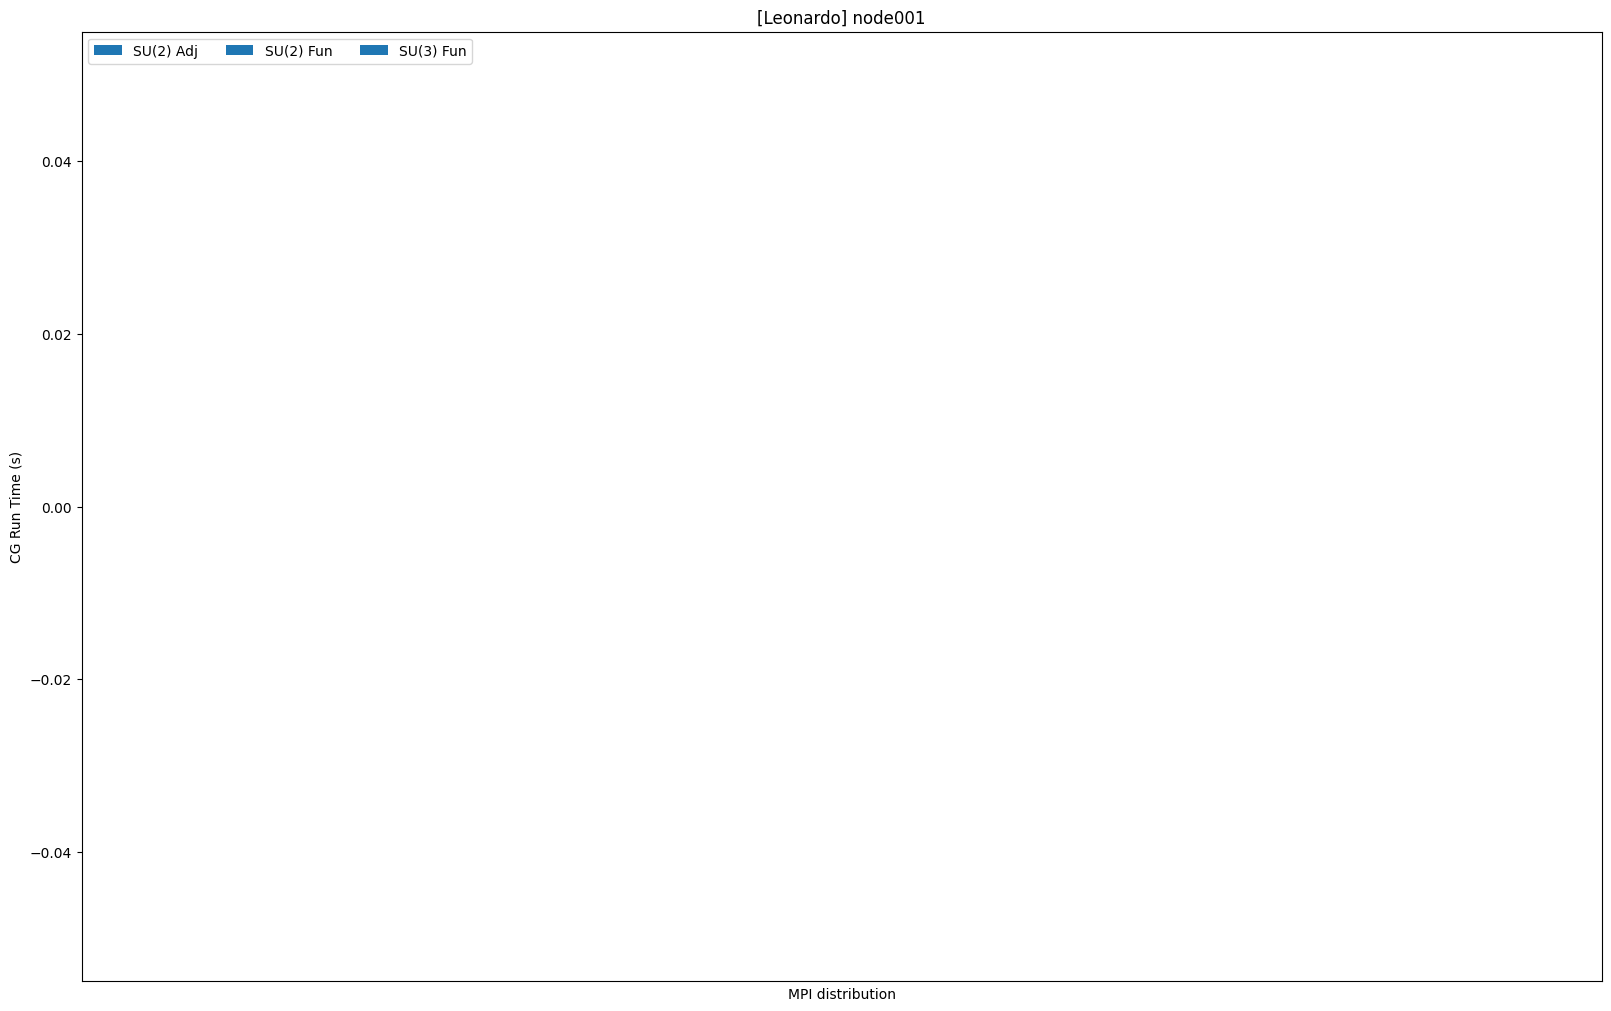

 == [Getting target file list      : plot_BenchRes_groupByBars_matplotlib] ==


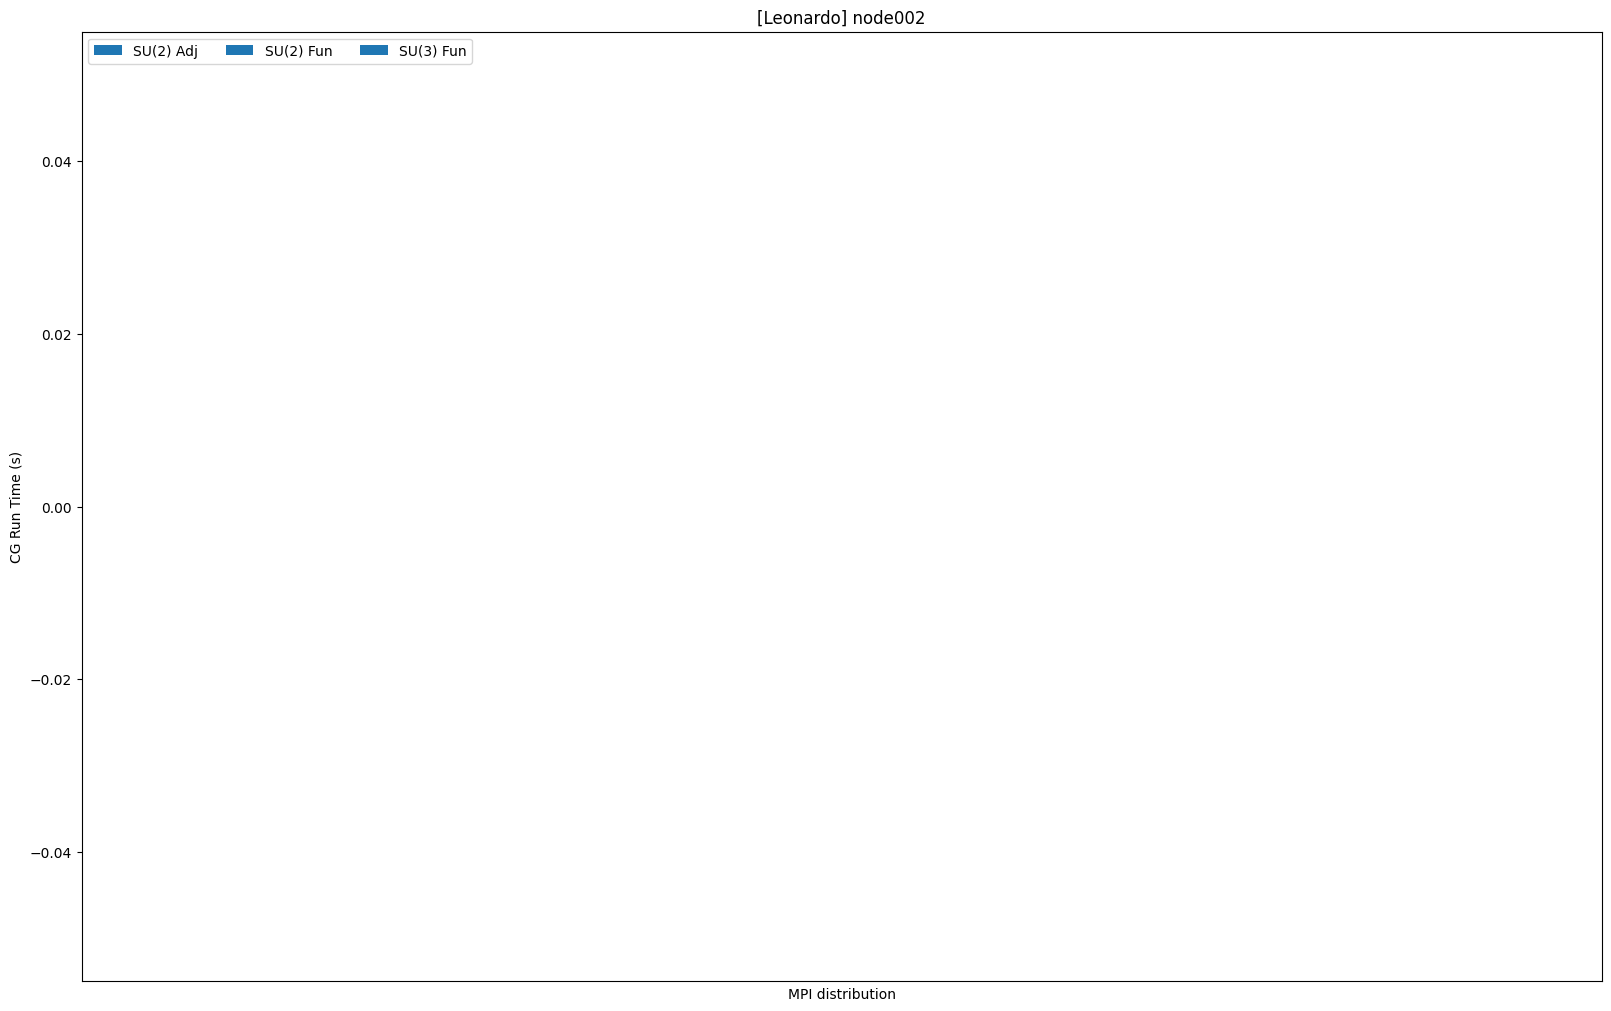

In [234]:
# --------------------------------------------------------------------------
# Reading in the inout file
m.printMesgStr("Plots DataFrame BKeeper small Leonardo-Booster    : ", c.getGreen(), machine_name_leonardo)

df_su2_adj_leonardo = dataFrame_BKeeper_small_leonardo[dataFrame_BKeeper_small_leonardo["Representation"] == "SU(2), adjoint"][["Representation", "CG Run Time (s)","mpi_distribution","nodes"]]
df_su2_fun_leonardo = dataFrame_BKeeper_small_leonardo[dataFrame_BKeeper_small_leonardo["Representation"] == "SU(2), fundamental"][["Representation", "CG Run Time (s)","mpi_distribution","nodes"]]
df_su3_fun_leonardo = dataFrame_BKeeper_small_leonardo[dataFrame_BKeeper_small_leonardo["Representation"] == "SU(3), fundamental"][["Representation", "CG Run Time (s)","mpi_distribution","nodes"]]

# PLoting data
df_su2_adj_leonardo_mpi_node001     = df_su2_adj_leonardo[df_su2_adj_leonardo["nodes"] == "001"][["mpi_distribution"]]
df_su2_adj_leonardo_cgtimes_node001 = df_su2_adj_leonardo[df_su2_adj_leonardo["nodes"] == "001"][["CG Run Time (s)"]]
df_su2_fun_leonardo_cgtimes_node001 = df_su2_fun_leonardo[df_su2_fun_leonardo["nodes"] == "001"][["CG Run Time (s)"]]
df_su3_fun_leonardo_cgtimes_node001 = df_su3_fun_leonardo[df_su3_fun_leonardo["nodes"] == "001"][["CG Run Time (s)"]]
rc = plot_BenchRes_groupByBars_matplotlib(c, m,
                                          df_su2_adj_leonardo_mpi_node001['mpi_distribution'],
                                          df_su2_adj_leonardo_cgtimes_node001['CG Run Time (s)'],
                                          df_su2_fun_leonardo_cgtimes_node001['CG Run Time (s)'],
                                          df_su3_fun_leonardo_cgtimes_node001['CG Run Time (s)'],
                                          machine_name_leonardo, "node001")

df_su2_adj_leonardo_mpi_node002     = df_su2_adj_leonardo[df_su2_adj_leonardo["nodes"] == "002"][["mpi_distribution"]]
df_su2_adj_leonardo_cgtimes_node002 = df_su2_adj_leonardo[df_su2_adj_leonardo["nodes"] == "002"][["CG Run Time (s)"]]
df_su2_fun_leonardo_cgtimes_node002 = df_su2_fun_leonardo[df_su2_fun_leonardo["nodes"] == "002"][["CG Run Time (s)"]]
df_su3_fun_leonardo_cgtimes_node002 = df_su2_fun_leonardo[df_su2_fun_leonardo["nodes"] == "002"][["CG Run Time (s)"]]
rc = plot_BenchRes_groupByBars_matplotlib(c, m,
                                          df_su2_adj_leonardo_mpi_node002['mpi_distribution'],
                                          df_su2_adj_leonardo_cgtimes_node002['CG Run Time (s)'],
                                          df_su2_fun_leonardo_cgtimes_node002['CG Run Time (s)'],
                                          df_su3_fun_leonardo_cgtimes_node002['CG Run Time (s)'],
                                          machine_name_leonardo, "node002")
# --------------------------------------------------------------------------

## Combined plots
### [BKeeper_run_gpu : small]
---

 == [Getting target file list      : plot_representation_matplotlib] ==


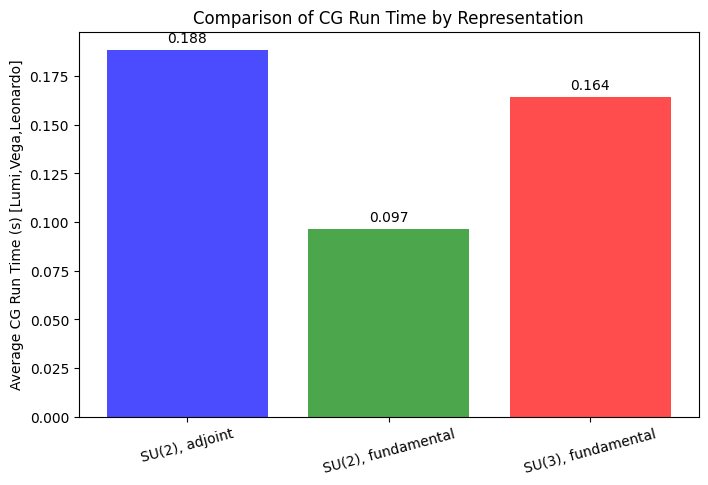

In [235]:
dataframe_representation_lst_combined = [df_su2_adj_lumi   , df_su2_fun_lumi    , df_su3_fun_lumi    ,
                                        df_su2_adj_vega    , df_su2_fun_vega    , df_su3_fun_vega    ,
                                        df_su2_adj_leonardo, df_su2_fun_leonardo, df_su3_fun_leonardo]

rc = plot_representation_matplotlib(c, m, dataframe_representation_lst_combined, str(machine_name_lumi+","+machine_name_vega+","+machine_name_leonardo))
